# Class Central Survey: compare target group with the rest of the sample

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

## Read the survey data

In [2]:
df = pd.read_csv('raw/2016-17-ClassCentral-Survey-data.csv', sep=';', decimal=',', skiprows=1)

## Create target group and make an example barchart plot 

In [3]:
df['Which region of the world are you in?'].value_counts()

United States                 818
Western Europe (except UK)    287
Africa                        276
India                         219
East & Southeast Asia         200
Eastern Europe                153
Central or South America      147
Canada                        104
United Kingdom                 98
Australia / New Zealand        92
Mexico                         47
Name: Which region of the world are you in?, dtype: int64

In [4]:
target_name = 'Latin America'
mask_latin_america = (df['Which region of the world are you in?'] == 'Central or South America') | \
    (df['Which region of the world are you in?'] =='Mexico')
target = df[mask_latin_america]
row = df[~mask_latin_america]
target_size, row_size = len(df[mask_latin_america]), len(df[~mask_latin_america])
target_size, row_size

(194, 2298)

In [5]:
len(df[mask_latin_america]), len(df[~mask_latin_america])

(194, 2298)

In [6]:
res_target = target['How familiar are you with MOOCs?'].value_counts()/target_size*100

In [7]:
res_row = row['How familiar are you with MOOCs?'].value_counts()/row_size*100
res_row

5.0    30.939948
4.0    22.106179
1.0    21.671018
3.0    14.490862
2.0     9.747607
Name: How familiar are you with MOOCs?, dtype: float64

In [8]:
result = pd.DataFrame({target_name: res_target, 'Rest of the World': res_row})
answer = 'answer'
result[answer] = result.index
result

,Latin America,Rest of the World,answer
1.0,13.402062,21.671018,1.0
2.0,7.216495,9.747607,2.0
3.0,13.917526,14.490862,3.0
4.0,26.288660,22.106179,4.0
5.0,39.175258,30.939948,5.0


In [9]:
res_df = pd.melt(result, id_vars=answer, var_name='loc', value_name='percent')
res_df

,answer,loc,percent
0,1.0,Latin America,13.402062
1,2.0,Latin America,7.216495
2,3.0,Latin America,13.917526
3,4.0,Latin America,26.288660
4,5.0,Latin America,39.175258
5,1.0,Rest of the World,21.671018
6,2.0,Rest of the World,9.747607
7,3.0,Rest of the World,14.490862
8,4.0,Rest of the World,22.106179
9,5.0,Rest of the World,30.939948


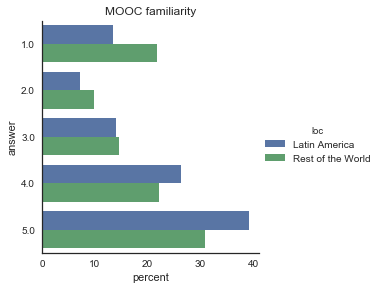

In [10]:
sns.factorplot(x='percent', y=answer, hue='loc', data=res_df, kind='bar', orient='h')
plt.title('MOOC familiarity')
plt.show()


Latin American visitors are more familiar with MOOCs than visitors from the rest of the world

## Create a generic function that can plot a barchart for any categorical feature on any target/nontarget split 

In [11]:
def binary_compare_categorical_feature_barh(mask, feature, df=df,
                                            target_name='target', nontarget_name='Rest of the World', 
                                            split_name='visitor', answer='answer'):
    """Split dataframe into two based on mask
    Draw horizontal barcharts for each category item for both masked and unmasked object"""
    target = df[mask]
    nontarget = df[~mask]
    target_size, nontarget_size = len(target), len(nontarget)
    
    res_target = target[feature].value_counts()/target_size*100
    res_nontarget = nontarget[feature].value_counts()/row_size*100
    
    result = pd.DataFrame({target_name: res_target, nontarget_name: res_nontarget})
    result[answer] = result.index
    
    res_df = pd.melt(result, id_vars=answer, var_name=split_name, value_name='percent')
    
    sns.factorplot(x='percent', y=answer, hue=split_name, data=res_df, kind='bar', orient='h')
    plt.title(feature)
    plt.show()

## Apply this plot on the target 'Latin America' for some categorical features

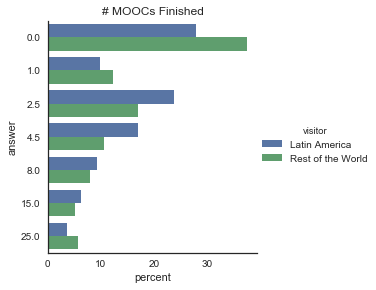

In [12]:
binary_compare_categorical_feature_barh(mask=mask_latin_america, 
                                        target_name='Latin America', feature='# MOOCs Finished')

Latin American Class Central visitors are more experienced compared to the rest of the world, they have in general finished more MOOCs

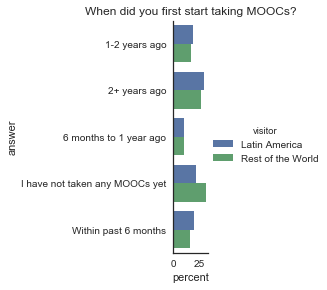

In [13]:
binary_compare_categorical_feature_barh(mask=mask_latin_america, 
                                        target_name='Latin America', feature='When did you first start taking MOOCs?')

They also started earlier with MOOCs

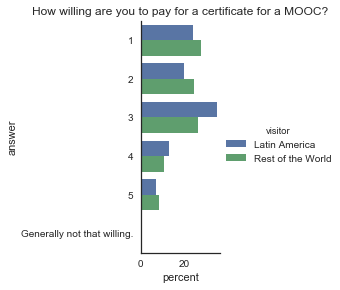

In [14]:
binary_compare_categorical_feature_barh(mask=mask_latin_america, 
                                        target_name='Latin America', feature='How willing are you to pay for a certificate for a MOOC?')

Latin American Class Central visitor show a higher willingness to pay for a MOOC certificate

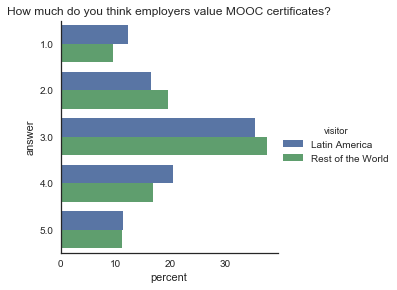

In [15]:
binary_compare_categorical_feature_barh(mask=mask_latin_america, 
                                        target_name='Latin America', 
                                        feature='How much do you think employers value MOOC certificates?')

Latin American Class Central visitors think employers value MOOC certificates somewhat more than in the rest of the world